In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import MicroTools as micro
import MiniTools as mini
import param_scan

from importlib.resources import open_text


## Creating MC sample data files from 2022 full MC files 

In [132]:
from MiniCollTools.core import load_sample
all_mc = load_sample.load_mc()

# Save numu data release
df = pd.DataFrame(all_mc['numu'])
df = df[(df['ntuple_energy'].to_numpy() > 0.2) & (df['ntuple_energy'].to_numpy() < 1.9) & (df.ntuple_inno.to_numpy() <= 2)]
arr = np.array([df['ntuple_energy'].to_numpy(), df['ntuple_enugen'].to_numpy(), df['ntuple_nuleng'].to_numpy(), df['cv_weight'].to_numpy()]).T
mini.apps.write_pickle('MiniTools/include/MB_data_release_2022/fhcmode/miniboone_numufullosc_ntuple', arr)

# Save numu data release
df = pd.DataFrame(all_mc['numubar'])
df = df[(df['ntuple_energy'].to_numpy() > 0.2) & (df['ntuple_energy'].to_numpy() < 1.9) & (df.ntuple_inno.to_numpy() <= 2)]
arr = np.array([df['ntuple_energy'].to_numpy(), df['ntuple_enugen'].to_numpy(), df['ntuple_nuleng'].to_numpy(), df['cv_weight'].to_numpy()]).T
mini.apps.write_pickle('MiniTools/include/MB_data_release_2022/rhcmode/miniboone_numubarfullosc_ntuple', arr)


# Save numu data release
df = pd.DataFrame(all_mc['nue'])
df = df[(df['ntuple_energy'].to_numpy() > 0.2) & (df['ntuple_energy'].to_numpy() < 3) & (df.ntuple_inno.to_numpy() == 3)]
arr = np.array([df['ntuple_energy'].to_numpy(), df['ntuple_enugen'].to_numpy(), df['ntuple_nuleng'].to_numpy(), df['cv_weight'].to_numpy()]).T
mini.apps.write_pickle('MiniTools/include/MB_data_release_2022/fhcmode/miniboone_numunuefullosc_ntuple', arr)

# Save numu data release
df = pd.DataFrame(all_mc['nuebar'])
df = df[(df['ntuple_energy'].to_numpy() > 0.2) & (df['ntuple_energy'].to_numpy() < 3) & (df.ntuple_inno.to_numpy() == 4)]
arr = np.array([df['ntuple_energy'].to_numpy(), df['ntuple_enugen'].to_numpy(), df['ntuple_nuleng'].to_numpy(), df['cv_weight'].to_numpy()]).T
mini.apps.write_pickle('MiniTools/include/MB_data_release_2022/rhcmode/miniboone_numubarnuebarfullosc_ntuple', arr)

# Building Migration Matrix

In [133]:
ETRUE_BINS = np.linspace(0, 3, 21)

# load all MC samples
Ereco_nue, Etrue_nue, Length_nue, Weight_nue = mini.apps.get_MC_from_data_release_nue(mode="fhc", year="2022" )
Ereco_numu, Etrue_numu, Length_numu, Weight_numu = (mini.apps.get_MC_from_data_release_numu(mode="fhc", year="2022"))
Ereco_nuebar, Etrue_nuebar, Length_nuebar, Weight_nuebar = (mini.apps.get_MC_from_data_release_nue(mode="rhc", year="2022"))
Ereco_numubar, Etrue_numubar, Length_numubar, Weight_numubar = (mini.apps.get_MC_from_data_release_numu(mode="rhc", year="2022"))

# Create all migration matrices
migration_matrix_official_bins_numu = mini.apps.create_reco_migration_matrix(
    ereco_bins = param_scan.MB_Ereco_official_bins_numu,
    etrue_bins = ETRUE_BINS,
    ereco_events = Ereco_numu,
    etrue_events = Etrue_numu,
    weights = Weight_numu
) 
migration_matrix_official_bins_numubar = mini.apps.create_reco_migration_matrix(
    ereco_bins = param_scan.MB_Ereco_official_bins_numu,
    etrue_bins = ETRUE_BINS,
    ereco_events = Ereco_numubar,
    etrue_events = Etrue_numubar,
    weights = Weight_numubar
) 

migration_matrix_official_bins_nue_11bins = mini.apps.create_reco_migration_matrix(
    ereco_bins = param_scan.MB_Ereco_official_bins,
    etrue_bins = ETRUE_BINS,
    ereco_events = Ereco_nue,
    etrue_events = Etrue_nue,
    weights = Weight_nue
) 

migration_matrix_official_bins_nue_13bins = mini.apps.create_reco_migration_matrix(
    ereco_bins = param_scan.MB_Ereco_unfold_bins,
    etrue_bins = ETRUE_BINS,
    ereco_events = Ereco_nue,
    etrue_events = Etrue_nue,
    weights = Weight_nue
) 

migration_matrix_official_bins_nuebar_11bins = mini.apps.create_reco_migration_matrix(
    ereco_bins = param_scan.MB_Ereco_official_bins,
    etrue_bins = ETRUE_BINS,
    ereco_events = Ereco_nuebar,
    etrue_events = Etrue_nuebar,
    weights = Weight_nuebar
) 

migration_matrix_official_bins_nuebar_13bins = mini.apps.create_reco_migration_matrix(
    ereco_bins = param_scan.MB_Ereco_unfold_bins,
    etrue_bins = ETRUE_BINS,
    ereco_events = Ereco_nuebar,
    etrue_events = Etrue_nuebar,
    weights = Weight_nuebar
) 

### Pickle
param_scan.write_pickle('MiniTools/include/migration_matrices/migration_matrix_official_bins_numu', migration_matrix_official_bins_numu)
param_scan.write_pickle('MiniTools/include/migration_matrices/migration_matrix_official_bins_nue_11bins', migration_matrix_official_bins_nue_11bins)
param_scan.write_pickle('MiniTools/include/migration_matrices/migration_matrix_official_bins_nue_13bins', migration_matrix_official_bins_nue_13bins)

param_scan.write_pickle('MiniTools/include/migration_matrices/migration_matrix_official_bins_numubar', migration_matrix_official_bins_numubar)
param_scan.write_pickle('MiniTools/include/migration_matrices/migration_matrix_official_bins_nuebar_11bins', migration_matrix_official_bins_nuebar_11bins)
param_scan.write_pickle('MiniTools/include/migration_matrices/migration_matrix_official_bins_nuebar_13bins', migration_matrix_official_bins_nuebar_13bins)

migration_matrix_official_bins_numu = param_scan.pickle_read('MiniTools/include/migration_matrices/migration_matrix_official_bins_numu.pkl')
migration_matrix_official_bins_nue_11bins = param_scan.pickle_read('MiniTools/include/migration_matrices/migration_matrix_official_bins_nue_11bins.pkl')
migration_matrix_official_bins_nue_13bins = param_scan.pickle_read('MiniTools/include/migration_matrices/migration_matrix_official_bins_nue_13bins.pkl')
migration_matrix_official_bins_numubar = param_scan.pickle_read('MiniTools/include/migration_matrices/migration_matrix_official_bins_numubar.pkl')
migration_matrix_official_bins_nuebar_11bins = param_scan.pickle_read('MiniTools/include/migration_matrices/migration_matrix_official_bins_nuebar_11bins.pkl')
migration_matrix_official_bins_nuebar_13bins = param_scan.pickle_read('MiniTools/include/migration_matrices/migration_matrix_official_bins_nuebar_13bins.pkl')

### Numpy
# np.save('MiniTools/include/migration_matrices/migration_matrix_official_bins_numu_numpy', migration_matrix_official_bins_numu)
# np.save('MiniTools/include/migration_matrices/migration_matrix_official_bins_nue_11bins_numpy', migration_matrix_official_bins_nue_11bins)
# np.save('MiniTools/include/migration_matrices/migration_matrix_official_bins_nue_13bins_numpy', migration_matrix_official_bins_nue_13bins)

# np.save('MiniTools/include/migration_matrices/migration_matrix_official_bins_numubar', migration_matrix_official_bins_numubar)
# np.save('MiniTools/include/migration_matrices/migration_matrix_official_bins_nuebar_11bins', migration_matrix_official_bins_nuebar_11bins)
# np.save('MiniTools/include/migration_matrices/migration_matrix_official_bins_nuebar_13bins', migration_matrix_official_bins_nuebar_13bins)

# migration_matrix_official_bins_numu_2 = np.load('MiniTools/include/migration_matrices/migration_matrix_official_bins_numu_numpy.npy', allow_pickle=True)
# migration_matrix_official_bins_nue_11bins_2 = np.load('MiniTools/include/migration_matrices/migration_matrix_official_bins_nue_11bins_numpy.npy', allow_pickle=True)
# migration_matrix_official_bins_nue_13bins_2 = np.load('MiniTools/include/migration_matrices/migration_matrix_official_bins_nue_13bins_numpy.npy', allow_pickle=True)
# migration_matrix_official_bins_numubar_2 = np.load('MiniTools/include/migration_matrices/migration_matrix_official_bins_numubar.npy', allow_pickle=True)
# migration_matrix_official_bins_nuebar_11bins_2 = np.load('MiniTools/include/migration_matrices/migration_matrix_official_bins_nuebar_11bins.npy', allow_pickle=True)
# migration_matrix_official_bins_nuebar_13bins_2 = np.load('MiniTools/include/migration_matrices/migration_matrix_official_bins_nuebar_13bins.npy', allow_pickle=True)

# print(np.sum(migration_matrix_official_bins_numu_2 == migration_matrix_official_bins_numu)/np.size(migration_matrix_official_bins_numu))
# print(np.sum(migration_matrix_official_bins_nue_11bins_2 == migration_matrix_official_bins_nue_11bins)/np.size(migration_matrix_official_bins_nue_11bins))
# print(np.sum(migration_matrix_official_bins_nue_13bins_2 == migration_matrix_official_bins_nue_13bins)/np.size(migration_matrix_official_bins_nue_13bins))

# print(np.sum(migration_matrix_official_bins_numubar_2 == migration_matrix_official_bins_numubar)/np.size(migration_matrix_official_bins_numubar))
# print(np.sum(migration_matrix_official_bins_nuebar_11bins_2 == migration_matrix_official_bins_nuebar_11bins)/np.size(migration_matrix_official_bins_nuebar_11bins))
# print(np.sum(migration_matrix_official_bins_nuebar_13bins_2 == migration_matrix_official_bins_nuebar_13bins)/np.size(migration_matrix_official_bins_nuebar_13bins))


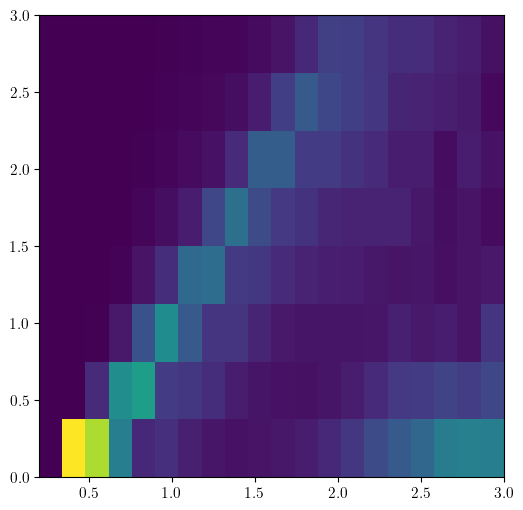

In [134]:

fig, ax = plt.subplots(figsize=(6,6))

# c = ax.imshow(1 - migration_matrix_official_bins_numu/migration_matrix_official_bins_numubar)
# ax.imshow(migration_matrix_official_bins_numu)
# fig.colorbar(c)
# ax.imshow(migration_matrix_official_bins_nuebar_11bins)
# ax.imshow(migration_matrix_official_bins_nuebar_13bins)
x = param_scan.MB_Ereco_unfold_bins
y = ETRUE_BINS

dx = (x[1:] - x[:-1])/2
dy = (y[1:] - y[:-1])/2

cax = ax.imshow(migration_matrix_official_bins_numu.T, extent=(x[0], x[-1], y[0], y[-1]),
  origin='lower', interpolation='nearest', cmap='viridis')

# ax.set_xticks(np.arange(len(x[::4]))*4)
# ax.set_xticklabels(x[::4])

# ax.set_yticks(np.arange(len(y[::4]))*4)
# ax.set_yticklabels(y[::4])
ax.set_aspect('auto')

## Test Migration matrices

In [135]:
# Pre-computed migration matrices
migration_matrix_official_bins_numu = mini.apps.pickle_read(
    "MiniTools/include/migration_matrices/migration_matrix_official_bins_numu.pkl"
)
migration_matrix_official_bins_nue_11bins = mini.apps.pickle_read(
    "MiniTools/include/migration_matrices/migration_matrix_official_bins_nue_11bins.pkl"
)
migration_matrix_official_bins_nue_13bins = mini.apps.pickle_read(
    "MiniTools/include/migration_matrices/migration_matrix_official_bins_nue_13bins.pkl"
)

migration_matrix_official_bins_numubar = mini.apps.pickle_read(
    "MiniTools/include/migration_matrices/migration_matrix_official_bins_numubar.pkl"
)
migration_matrix_official_bins_nuebar_11bins = mini.apps.pickle_read(
    "MiniTools/include/migration_matrices/migration_matrix_official_bins_nuebar_11bins.pkl"
)
migration_matrix_official_bins_nuebar_13bins = mini.apps.pickle_read(
    "MiniTools/include/migration_matrices/migration_matrix_official_bins_nuebar_13bins.pkl"
)

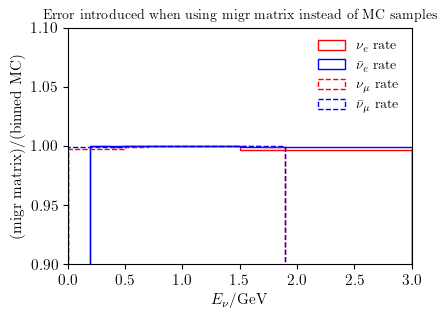

In [137]:
bins = param_scan.MB_Ereco_official_bins
bin_w = np.diff(bins)
bins_numu = param_scan.MB_Ereco_official_bins_numu
bin_numu_w = np.diff(bins_numu)


mig_rate_nue = np.dot(
    param_scan.fast_histogram(
        Etrue_nue, bins=ETRUE_BINS, weights=Weight_nue
    )[0],
    migration_matrix_official_bins_nue_11bins,
)

std_rate_nue=param_scan.fast_histogram(Ereco_nue, weights=Weight_nue, bins = bins)[0]

mig_rate_nuebar = np.dot(
    param_scan.fast_histogram(
        Etrue_nuebar, bins=ETRUE_BINS, weights=Weight_nuebar
    )[0],
    migration_matrix_official_bins_nuebar_11bins,
)

std_rate_nuebar=param_scan.fast_histogram(Ereco_nuebar, weights=Weight_nuebar, bins = bins)[0]

mig_rate_numu = np.dot(
    param_scan.fast_histogram(
        Etrue_numu, bins=ETRUE_BINS, weights=Weight_numu
    )[0],
    migration_matrix_official_bins_numu,
)

std_rate_numu=param_scan.fast_histogram(Ereco_numu, weights=Weight_numu, bins = bins_numu)[0]

mig_rate_numubar = np.dot(
    param_scan.fast_histogram(
        Etrue_numubar, bins=ETRUE_BINS, weights=Weight_numubar
    )[0],
    migration_matrix_official_bins_numubar,
)

std_rate_numubar=param_scan.fast_histogram(Ereco_numubar, weights=Weight_numubar, bins = bins_numu)[0]

plt.hist(bins[:-1], weights=(mig_rate_nue/std_rate_nue), bins = bins,color='red', histtype='step', label=r'$\nu_e$ rate')
plt.hist(bins[:-1], weights=(mig_rate_nuebar/std_rate_nuebar), bins = bins,color='blue', histtype='step', label=r'$\bar\nu_e$ rate')
plt.hist(bins_numu[:-1], weights=(mig_rate_numu/std_rate_numu), bins = bins_numu,color='red', histtype='step', ls='--', label=r'$\nu_\mu$ rate')
plt.hist(bins_numu[:-1], weights=(mig_rate_numubar/std_rate_numubar), bins = bins_numu,color='blue', histtype='step', ls='--', label=r'$\bar\nu_\mu$ rate')
# plt.step(bins[:-1], std_rate/mig_rate, where='post')
plt.axhline(0, c='black', lw=0.5, ls='--')
plt.xlabel(r'$E_\nu$/GeV')
plt.ylabel(r'(migr matrix)/(binned MC)')
plt.xlim(0.0,3)
plt.ylim(0.9,1.1)
plt.legend()
plt.title("Error introduced when using migr matrix instead of MC samples", fontsize=10)
plt.savefig('plots/error_introduced_migr_matrix.pdf', bbox_inches='tight')

In [62]:
print(Etrue_numu.min(), Etrue_numu.max())
print(Ereco_numu.min(), Ereco_numu.max())

0.27137953 6.572321
0.23982297 2.9999757


## Check that MC samples recover the expected bkgrates

/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_52996/2199676118.py:16: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  open_text(


(0.0, 2.0)

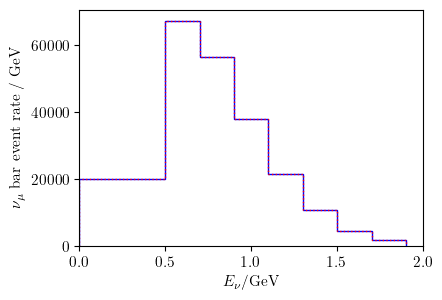

In [34]:
bins = param_scan.MB_Ereco_official_bins_numu
bin_w = np.diff(bins)
mode = 'rhc'
bar = '' if mode == 'fhc' else 'bar'

df = pd.DataFrame(all_mc[f'numu{bar}'])
df = df[(df['ntuple_energy'] > 0.2) & (df['ntuple_energy'] < 3) & (df.ntuple_inno <= 2)]

# Ereco_2, Etrue_2, Length_2, Weight_2 = np.array([df['ntuple_energy'], df['ntuple_enugen'], df['ntuple_nuleng'], df['cv_weight']])
Ereco_2, Etrue_2, Length_2, Weight_2 = mini.apps.pickle_read(f'MiniTools/include/MB_data_release_2022/{mode}mode/miniboone_numu{bar}fullosc_ntuple.pkl').T

hist_2=param_scan.fast_histogram(Ereco_2, weights=Weight_2, bins = bins)[0]
plt.hist(bins[:-1], weights=hist_2/bin_w, bins = bins,color='blue', histtype='step', ls='-')

numu_MC_app = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2020.{mode}mode", f"miniboone_numu{bar}.txt"
        )
    )
plt.hist(bins[:-1], weights=numu_MC_app/bin_w, bins = bins,color='red', histtype='step', ls=':')

plt.xlabel(r'$E_\nu$/GeV')
plt.ylabel(fr'$\nu_\mu$ {bar} event rate / GeV')
plt.xlim(0, 2)

/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_52996/2348755768.py:21: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  open_text(


(0.0, 3.0)

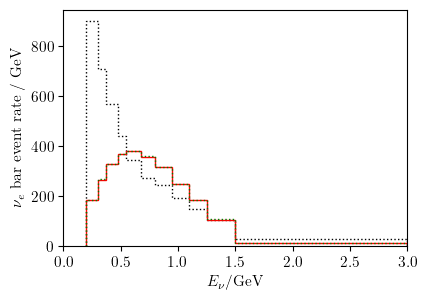

In [35]:
mode = 'rhc'
bar = '' if mode == 'fhc' else 'bar'
df = pd.DataFrame(all_mc[f'nue{bar}'])
df = df[(df['ntuple_energy'] > 0.2) & (df['ntuple_energy'] < 3) & (df.ntuple_inno == (3 if mode == 'fhc' else 4))]
bins = param_scan.MB_Ereco_official_bins
bin_w = np.diff(bins)

# Ereco_fhc, Etrue_fhc, Length_fhc, Weight_fhc = mini.apps.get_MC_from_data_release_nue(mode='fhc', year='2020')
# Ereco_rhc, Etrue_rhc, Length_rhc, Weight_rhc = mini.apps.get_MC_from_data_release_nue(mode='rhc', year='2020')
# Ereco, Etrue, Length, Weight = np.concatenate((Ereco_fhc,Ereco_rhc)), np.concatenate((Etrue_fhc,Etrue_rhc)), np.concatenate((Length_fhc,Length_rhc)), np.concatenate((Weight_fhc,Weight_rhc))

Ereco, Etrue, Length, Weight = mini.apps.get_MC_from_data_release_nue(mode=mode, year='2020')
# Ereco_2, Etrue_2, Length_2, Weight_2 = np.array([df['ntuple_energy'], df['ntuple_enugen'], df['ntuple_nuleng'], df['cv_weight']])
Ereco_2, Etrue_2, Length_2, Weight_2 = mini.apps.pickle_read(f'MiniTools/include/MB_data_release_2022/{mode}mode/miniboone_numu{bar}nue{bar}fullosc_ntuple.pkl').T


hist=param_scan.fast_histogram(Ereco, weights=Weight, bins = bins)[0]
hist_2=param_scan.fast_histogram(Ereco_2, weights=Weight_2, bins = bins)[0]

nue_bkg_app = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2020.combined",
            f"miniboone_nue{bar}bgr_lowe.txt",
        )
    )
plt.hist(bins[:-1], weights=nue_bkg_app/bin_w, bins = bins,color='black', histtype='step', ls=':')
plt.hist(bins[:-1], weights=1e-2*hist/bin_w, bins = bins,color='red', histtype='step', ls='-')
plt.hist(bins[:-1], weights=1e-2*hist_2/bin_w, bins = bins,color='green', histtype='step', ls=':')

plt.xlabel(r'$E_\nu$/GeV')
plt.ylabel(fr'$\nu_e$ {bar} event rate / GeV')
plt.xlim(0, 3)

# Checking the param_scan rate calculation

28.20134670472555 64.13897817424436


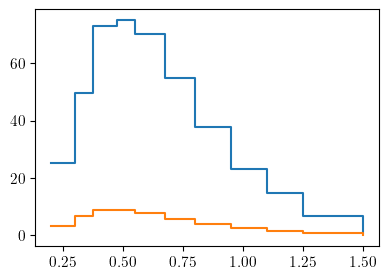

In [36]:
params = {'g': 1, 'Ue4Sq': 0.1, 'Um4Sq': 3e-3/4, 'm4': 1}

bins = param_scan.MB_Ereco_official_bins
bin_w = np.diff(bins)
rates_dic = param_scan.get_nue_rates(params, oscillations=True, use_numu_MC=False, include_antineutrinos=True, decay=False, decouple_decay=True, disappearance=False, energy_degradation=False, n_replications=1)
plt.step(bins[:-1], rates_dic['MC_nue_app']/bin_w, where='post')
plt.step(bins[:-1], rates_dic['MC_nuebar_app']/bin_w, where='post')

MB_chi2 = mini.fit.chi2_MiniBooNE(
    rates_dic["MC_nue_app"], year="2020"
)
MB_chi2_comb = mini.fit.chi2_MiniBooNE_combined(
    rates_dic["MC_nue_app"], rates_dic["MC_nuebar_app"], year="2020"
)

print(MB_chi2, MB_chi2_comb)

# Profiling functions

In [39]:
# %%prun
params = {'g': 1, 'Ue4Sq': 1, 'Um4Sq': 2e-3/4, 'm4': 1}
param_scan.DecayReturnMicroBooNEChi2(params, oscillations=True, use_numu_MC=True, include_antineutrinos=True, decay=False, decouple_decay=True, disappearance=True, energy_degradation=False, n_replications=1)

[1, 1, 1, 0.0005, 52.33098656295388, 107.01657298723849, 9.269424089391496]

In [ ]:
MC_data_app = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2020.{mode}mode",
            f"miniboone_numu{bar}nue{bar}fullosc_ntuple.txt",
        )
    )
nue_data_app = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2020.{mode}mode",
            f"miniboone_nue{bar}data_lowe.txt",
        )
    )
numu_data_app = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2020.{mode}mode",
            f"miniboone_numu{bar}data.txt",
        )
    )

nue_bkg_app = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2020.{mode}mode",
            f"miniboone_nue{bar}bgr_lowe.txt",
        )
    )
numu_MC_app = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2020.{mode}mode", f"miniboone_numu{bar}.txt"
        )
    )

fract_covariance_app = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2020.{mode}mode",
            f"miniboone_full_fractcovmatrix_nu{bar}_lowe.txt",
        )
    )

    # energy bins -- same for nu and nubar
bin_e_app = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2020.combined",
            f"miniboone_binboundaries_nue_lowe.txt",
        )
    )
bin_widths_app = np.diff(bin_e_app)
bin_edges_numu_app = np.array([0, 0.5, 0.7, 0.9, 1.1, 1.3, 1.50, 1.7, 1.9]) * 1e3  # MeV

/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_41607/3845048022.py:2: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  open_text(
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_41607/3845048022.py:8: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  open_text(
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_41607/3845048022.py:14: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  open_text(
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_41607/3845048022.py:21: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https:/

In [223]:
%%prun
for i in range(2):
    params = {'g': 1, 'Ue4Sq': 1e-1, 'Um4Sq': 2e-2, 'm4': 1}
    param_scan.DecayReturnMicroBooNEChi2(params, oscillations=True, decay=False, decouple_decay=True, disappearance=True, energy_degradation=False, n_replications=10)

         44962 function calls (44936 primitive calls) in 0.281 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        4    0.072    0.018    0.076    0.019 inclusive_osc_tools.py:492(Decay_muB_OscChi2)
       14    0.050    0.004    0.050    0.004 param_scan.py:89(numba_histogram)
      310    0.030    0.000    0.030    0.000 sterile_tools.py:107(_Fosc)
        8    0.025    0.003    0.025    0.003 {built-in method numpy.core._multiarray_umath.interp}
        2    0.011    0.006    0.011    0.006 linalg.py:492(inv)
        8    0.011    0.001    0.011    0.001 sterile_tools.py:119(_Fdec)
        4    0.009    0.002    0.009    0.002 param_scan.py:77(create_Etrue_and_Weight_int)
     6828    0.007    0.000    0.007    0.000 sterile_tools.py:99(Ldec)
     6510    0.007    0.000    0.007    0.000 sterile_tools.py:131(<lambda>)
        1    0.005    0.005    0.282    0.282 <string>:1(<module>)
        8    0.005    0.001    0.

# Test MC releases

In [49]:
mode='fhc'
bar=''

In [50]:
MC_data = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_numudis_2009.{mode}mode",
            f"miniboone_numu{bar}_ntuple.txt",
        )
    )
numu_data = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_numudis_2009.{mode}mode",
            f"miniboone_numu{bar}data_disap.txt",
        )
    )

fract_covariance = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_numudis_2009.{mode}mode",
            f"miniboone_frac_shape_matrix_numu{bar}_disap.txt",
        )
    )

    # energy bins -- same for nu and nubar
bin_e = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_numudis_2009.{mode}mode",
            f"miniboone_binboundaries_disap.txt",
        )
    )
bin_e *= 1e3
bin_widths = np.diff(bin_e)

/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_41607/2725951673.py:2: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  open_text(
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_41607/2725951673.py:8: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  open_text(
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_41607/2725951673.py:15: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  open_text(
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_41607/2725951673.py:23: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https:/

In [51]:
MC_data_app = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2020.{mode}mode",
            f"miniboone_numu{bar}nue{bar}fullosc_ntuple.txt",
        )
    )
nue_data_app = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2020.{mode}mode",
            f"miniboone_nue{bar}data_lowe.txt",
        )
    )
numu_data_app = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2020.{mode}mode",
            f"miniboone_numu{bar}data.txt",
        )
    )

nue_bkg_app = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2020.{mode}mode",
            f"miniboone_nue{bar}bgr_lowe.txt",
        )
    )
numu_MC_app = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2020.{mode}mode", f"miniboone_numu{bar}.txt"
        )
    )

fract_covariance_app = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2020.{mode}mode",
            f"miniboone_full_fractcovmatrix_nu{bar}_lowe.txt",
        )
    )

    # energy bins -- same for nu and nubar
bin_e_app = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2020.combined",
            f"miniboone_binboundaries_nue_lowe.txt",
        )
    )
bin_widths_app = np.diff(bin_e_app)
bin_edges_numu_app = np.array([0, 0.5, 0.7, 0.9, 1.1, 1.3, 1.50, 1.7, 1.9]) * 1e3  # MeV

/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_41607/3845048022.py:2: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  open_text(
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_41607/3845048022.py:8: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  open_text(
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_41607/3845048022.py:14: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  open_text(
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_41607/3845048022.py:21: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https:/

In [52]:
MC_data_app_2018 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2018.{mode}mode",
            f"miniboone_numu{bar}nue{bar}fullosc_ntuple.txt",
        )
    )
nue_data_app_2018 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2018.{mode}mode",
            f"miniboone_nue{bar}data_lowe.txt",
        )
    )
numu_data_app_2018 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2018.{mode}mode",
            f"miniboone_numu{bar}data.txt",
        )
    )

nue_bkg_app_2018 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2018.{mode}mode",
            f"miniboone_nue{bar}bgr_lowe.txt",
        )
    )
numu_MC_app_2018 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2018.{mode}mode", f"miniboone_numu{bar}.txt"
        )
    )

fract_covariance_app_2018 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2018.{mode}mode",
            f"miniboone_full_fractcovmatrix_nu{bar}_lowe.txt",
        )
    )

    # energy bins -- same for nu and nubar
bin_e_app_2018 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2018.fhcmode",
            f"miniboone_binboundaries_nue_lowe.txt",
        )
    )
bin_widths_app_2018 = np.diff(bin_e_app_2018)
bin_edges_numu_app_2018 = np.array([0, 0.5, 0.7, 0.9, 1.1, 1.3, 1.50, 1.7, 1.9]) * 1e3  # MeV

/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_41607/4061615260.py:2: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  open_text(
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_41607/4061615260.py:8: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  open_text(
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_41607/4061615260.py:14: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  open_text(
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_41607/4061615260.py:21: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https:/

In [53]:
MC_data_app_2012 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2012.{mode}mode",
            f"miniboone_numu{bar}nue{bar}fullosc_ntuple.txt",
        )
    )
nue_data_app_2012 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2012.{mode}mode",
            f"miniboone_nue{bar}data_lowe.txt",
        )
    )
numu_data_app_2012 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2012.{mode}mode",
            f"miniboone_numu{bar}data.txt",
        )
    )

nue_bkg_app_2012 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2012.{mode}mode",
            f"miniboone_nue{bar}bgr_lowe.txt",
        )
    )
numu_MC_app_2012 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2012.{mode}mode", f"miniboone_numu{bar}.txt"
        )
    )

fract_covariance_app_2012 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2012.{mode}mode",
            f"miniboone_full_fractcovmatrix_nu{bar}_lowe.txt",
        )
    )

    # energy bins -- same for nu and nubar
bin_e_app_2012 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2012.fhcmode",
            f"miniboone_binboundaries_nue_lowe.txt",
        )
    )
bin_widths_app_2012 = np.diff(bin_e_app_2012)
bin_edges_numu_app_2012 = np.array([0, 0.5, 0.7, 0.9, 1.1, 1.3, 1.50, 1.7, 1.9]) * 1e3  # MeV

/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_41607/850314770.py:2: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  open_text(
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_41607/850314770.py:8: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  open_text(
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_41607/850314770.py:14: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  open_text(
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_41607/850314770.py:21: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://imp

In [54]:
MC_data_app_2009 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2009.{mode}mode",
            f"miniboone_numu{bar}nue{bar}fullosc_ntuple.txt",
        )
    )
nue_data_app_2009 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2009.{mode}mode",
            f"miniboone_nue{bar}data_lowe.txt",
        )
    )
numu_data_app_2009 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2009.{mode}mode",
            f"miniboone_numu{bar}data.txt",
        )
    )

nue_bkg_app_2009 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2009.{mode}mode",
            f"miniboone_nue{bar}bgr_lowe.txt",
        )
    )
numu_MC_app_2009 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2009.{mode}mode", f"miniboone_numu{bar}.txt"
        )
    )

fract_covariance_app_2009 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2009.{mode}mode",
            f"miniboone_full_fractcovmatrix_nu{bar}_lowe.txt",
        )
    )

    # energy bins -- same for nu and nubar
bin_e_app_2009 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2009.fhcmode",
            f"miniboone_binboundaries_lowe.txt",
        )
    )
bin_widths_app_2009 = np.diff(bin_e_app_2009)
bin_edges_numu_app_2009 = np.array([0, 0.5, 0.7, 0.9, 1.1, 1.3, 1.50, 1.7, 1.9]) * 1e3  # MeV

/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_41607/74215449.py:2: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  open_text(
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_41607/74215449.py:8: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  open_text(
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_41607/74215449.py:14: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  open_text(
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_41607/74215449.py:21: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importl

In [55]:
# Load the MiniBooNE MC from data release\
Ereco = MC_data[:, 1]*1e3 # MeV
Etrue = MC_data[:, 2]*1e3 # MeV
Length = MC_data[:, 3] # Kilometers
if mode=='fhc':
    RELATIVE_POTS_09_to_20_dis = 5.58 / 18.75
    Weight = MC_data[:, 4] / np.sum(MC_data[:, 4]) * 1.90454e5 / RELATIVE_POTS_09_to_20_dis
else:
    RELATIVE_POTS_09_to_20_dis =  3.39 / 11.27
    Weight = MC_data[:, 4] / np.sum(MC_data[:, 4]) * 2.7053e4 / RELATIVE_POTS_09_to_20_dis

In [56]:
# Load the MiniBooNE MC from data release\
Ereco_app = MC_data_app[:, 0] # MeV
Etrue_app = MC_data_app[:, 1] # MeV
Length_app = MC_data_app[:, 2] / 1e5  # Kilometers
Weight_app = MC_data_app[:, 3] / len(MC_data_app[:, 3])

# Load the MiniBooNE MC from data release\
if mode == 'fhc':
    RELATIVE_POTS_18_to_20 = 12.84 / 18.75
else:
    RELATIVE_POTS_18_to_20 = 11.27 / 11.27 # Same dataset

Ereco_app_2018 = MC_data_app_2018[:, 0] # MeV
Etrue_app_2018 = MC_data_app_2018[:, 1] # MeV
Length_app_2018 = MC_data_app_2018[:, 2] / 1e5  # Kilometers
Weight_app_2018 = MC_data_app_2018[:, 3] / len(MC_data_app_2018[:, 3]) / RELATIVE_POTS_18_to_20

# Load the MiniBooNE MC from data release\
if mode == 'fhc':
    RELATIVE_POTS_12_to_20 = 6.46 / 18.75
else:
    RELATIVE_POTS_12_to_20 = 11.27 / 11.27 # Same dataset

Ereco_app_2012 = MC_data_app_2012[:, 0] # MeV
Etrue_app_2012 = MC_data_app_2012[:, 1] # MeV
Length_app_2012 = MC_data_app_2012[:, 2] / 1e5  # Kilometers
Weight_app_2012 = MC_data_app_2012[:, 3] / len(MC_data_app_2012[:, 3]) / RELATIVE_POTS_12_to_20


# Load the MiniBooNE MC from data release\
if mode == 'fhc':
    RELATIVE_POTS_09_to_20 = 6.46 / 18.75
else:
    RELATIVE_POTS_09_to_20 = 3.39 / 11.27

Ereco_app_2009 = MC_data_app_2009[:, 0] # MeV
Etrue_app_2009 = MC_data_app_2009[:, 1] # MeV
Length_app_2009 = MC_data_app_2009[:, 2] / 1e5  # Kilometers
Weight_app_2009 = MC_data_app_2009[:, 3] / len(MC_data_app_2009[:, 3]) / RELATIVE_POTS_09_to_20

In [57]:
MC_numu, _ = np.histogram(Ereco, weights=Weight, bins=bin_edges_numu_app, density=False)
numu_MC_app_2009.sum()/RELATIVE_POTS_09_to_20, numu_MC_app_2012.sum()/RELATIVE_POTS_12_to_20, numu_MC_app_2018.sum()/RELATIVE_POTS_18_to_20, numu_MC_app.sum(), MC_numu.sum(), numu_data.sum()/RELATIVE_POTS_09_to_20_dis

(339502.6799535603,
 339345.9911958204,
 339345.99220210285,
 339345.992202,
 639966.3978494633,
 639966.3978494623)

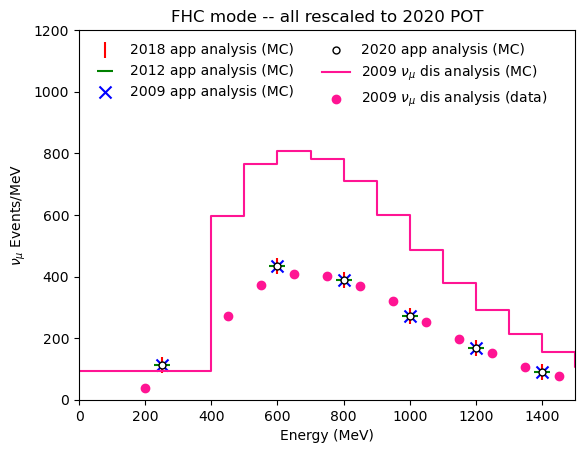

In [58]:
norm_numu_app = np.diff(bin_edges_numu_app)
bin_c = bin_edges_numu_app[:-1] + np.diff(bin_edges_numu_app)/2
plt.scatter(bin_c, numu_MC_app_2018/RELATIVE_POTS_18_to_20/norm_numu_app, color='red', marker='|', s=120, label=r'2018 app analysis (MC)')
plt.scatter(bin_c, numu_MC_app_2012/RELATIVE_POTS_12_to_20/norm_numu_app, color='green', marker='_', s=120, label=r'2012 app analysis (MC)')
plt.scatter(bin_c, numu_MC_app_2009/RELATIVE_POTS_09_to_20/norm_numu_app, color='blue', marker='x', s=75, label=r'2009 app analysis (MC)')
plt.scatter(bin_c, numu_MC_app/norm_numu_app, facecolor='white', edgecolor='black', marker='.', s=100, label=r'2020 app analysis (MC)')


# MC_numu, _ = np.histogram(Ereco, weights=Weight, bins=bin_edges_numu_app, density=False)
# plt.step(bin_edges_numu_app[:-1], (MC_numu)/norm_numu_app, where='post', color='dodgerblue', label=r'2009 $\nu_\mu$ dis release (MC)')
MC_numu, _ = np.histogram(Ereco, weights=Weight, bins=bin_e, density=False)
plt.step(bin_e[:-1], (MC_numu)/np.diff(bin_e), where='post', color='deeppink', label=r'2009 $\nu_\mu$ dis analysis (MC)')
plt.scatter(bin_e[:-1]+np.diff(bin_e)/2, numu_data/RELATIVE_POTS_09_to_20_dis/np.diff(bin_e)/2, color='deeppink', label=r'2009 $\nu_\mu$ dis analysis (data)')

plt.xlim(0,1500)
if mode == 'fhc':
    plt.ylim(0,1200)
    plt.ylabel(r'$\nu_\mu$ Events/MeV')
else:
    plt.ylim(0,140)
    plt.ylabel(r'$\overline{\nu}_\mu$ Events/MeV')
plt.xlabel('Energy (MeV)')
plt.legend(frameon=False, loc='upper left', ncol=2)
plt.title(f'{mode.upper()} mode -- all rescaled to 2020 POT')
plt.savefig(f'plots/comparison_numus_{mode}mode.pdf', dpi=300, bbox_inches='tight')

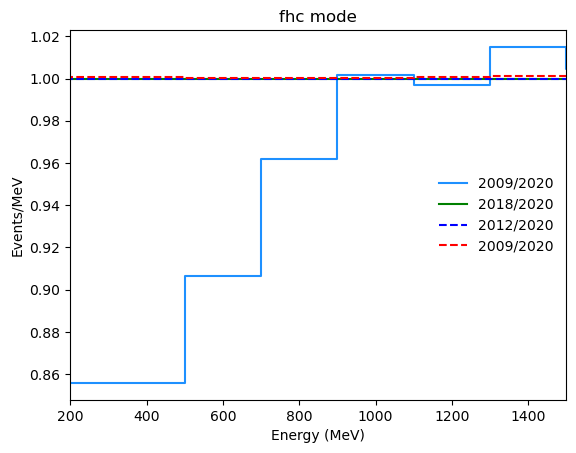

In [59]:
normalization = bin_widths
normalization = np.diff(bin_edges_numu_app)
MC_numu, _ = np.histogram(Ereco, weights=Weight, bins=bin_edges_numu_app, density=False)
plt.step(bin_edges_numu_app[:-1], MC_numu/numu_MC_app/2, where='post', color='dodgerblue', label=r'2009/2020')
plt.step(bin_edges_numu_app[:-1], numu_MC_app_2018/RELATIVE_POTS_18_to_20/numu_MC_app, where='post', color='green', label=r'2018/2020')
plt.step(bin_edges_numu_app[:-1], numu_MC_app_2012/RELATIVE_POTS_12_to_20/numu_MC_app, where='post', color='blue', ls='--', label=r'2012/2020')
plt.step(bin_edges_numu_app[:-1], numu_MC_app_2009/RELATIVE_POTS_09_to_20/numu_MC_app, where='post', color='red', ls='--', label=r'2009/2020')

plt.xlim(200,1500)
# plt.ylim(0,600)
plt.ylabel('Events/MeV')
plt.xlabel('Energy (MeV)')
plt.legend(frameon=False, loc='center right')
plt.title(f'{mode} mode')
plt.savefig(f'plots/comparison_numus_{mode}mode.pdf', dpi=300, bbox_inches='tight')

In [23]:
MBSig_for_unfolding = param_scan.fast_histogram(Ereco_app*1e-3, weights=Weight_app, bins=param_scan.MB_Ereco_official_bins)[0]
# MicroBooNE fully inclusive signal by unfolding MiniBooNE Signal
uBFC = param_scan.GBFC.miniToMicro(MBSig_for_unfolding)
uBFC = np.insert(uBFC, 0, [0.0])
uBFC = np.append(uBFC, 0.0)

# MicroBooNE partially inclusive signal by unfolding MiniBooNE Signal
uBPC = param_scan.GBPC.miniToMicro(MBSig_for_unfolding)
uBPC = np.insert(uBPC, 0, [0.0])
uBPC = np.append(uBPC, 0.0)

uBtemp = np.concatenate([uBFC, uBPC, np.zeros(85)])

In [24]:
from MicroTools.InclusiveTools.inclusive_osc_tools import (
    Decay_muB_OscChi2,
    DecayMuBNuMuDis,
    DecayMuBNuEDis,
)
oscillations = True
decay = False
decouple_decay = True
disappearance = False
energy_degradation = False

theta = {'g': 1, 'Ue4Sq': 1e-1, 'Um4Sq': 2e-2, 'm4': 1}

# \nu_mu disappearance signal replacement
NuMuReps = DecayMuBNuMuDis(
    theta,
    oscillations=oscillations,
    decay=decay,
    decouple_decay=decouple_decay,
    disappearance=disappearance,
    energy_degradation=energy_degradation,
)
# \nu_e disappearance signal replacement
NuEReps = DecayMuBNuEDis(
    theta,
    oscillations=oscillations,
    decay=decay,
    decouple_decay=decouple_decay,
    disappearance=disappearance,
    energy_degradation=energy_degradation,
)
# MicroBooNE
MuB_chi2 = Decay_muB_OscChi2(
    theta,
    uBtemp,
    constrained=False,
    sigReps=[NuEReps[0], NuEReps[1], NuMuReps[0], NuMuReps[1], None, None, None],
    RemoveOverflow=True,
    oscillations=oscillations,
    decay=decay,
    decouple_decay=decouple_decay,
    disappearance=disappearance,
    energy_degradation=energy_degradation,
)


In [25]:
%%prun
for i in range(100):
    Decay_muB_OscChi2(
        theta,
        uBtemp,
        constrained=False,
        sigReps=[NuEReps[0], NuEReps[1], NuMuReps[0], NuMuReps[1], None, None, None],
        RemoveOverflow=True,
        oscillations=oscillations,
        decay=decay,
        decouple_decay=decouple_decay,
        disappearance=disappearance,
        energy_degradation=energy_degradation,
    )


         34983 function calls in 1.737 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      100    1.668    0.017    1.736    0.017 inclusive_osc_tools.py:490(Decay_muB_OscChi2)
    13700    0.031    0.000    0.031    0.000 inclusive_osc_tools.py:172(CNPStat)
      100    0.028    0.000    0.033    0.000 _basic.py:903(inv)
      100    0.003    0.000    0.003    0.000 function_base.py:564(asarray_chkfinite)
      200    0.001    0.000    0.001    0.000 {built-in method numpy.zeros}
    14500    0.001    0.000    0.001    0.000 {built-in method builtins.len}
      100    0.001    0.000    0.002    0.000 param_scan.py:124(__init__)
      300    0.001    0.000    0.001    0.000 function_base.py:2285(__init__)
        1    0.001    0.001    1.737    1.737 <string>:1(<module>)
      100    0.001    0.000    0.004    0.000 _util.py:260(_asarray_validated)
      100    0.000    0.000    0.000    0.000 {method 'reduce' of 'numpy.u

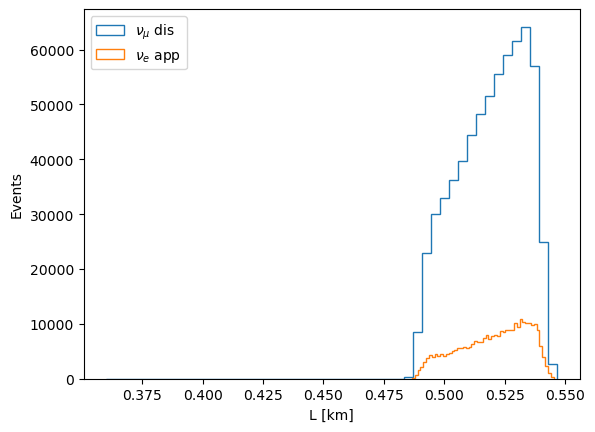

In [ ]:
_=plt.hist(Length, bins=50, weights=Weight, fc='orange', histtype='step', density=False, label=r'$\nu_\mu$ dis')
_=plt.hist(Length_app, bins=50, weights=Weight_app, fc='dodgerblue', histtype='step', density=False, label=r'$\nu_e$ app')
plt.xlabel('L [km]')
plt.ylabel('Events')
plt.legend()

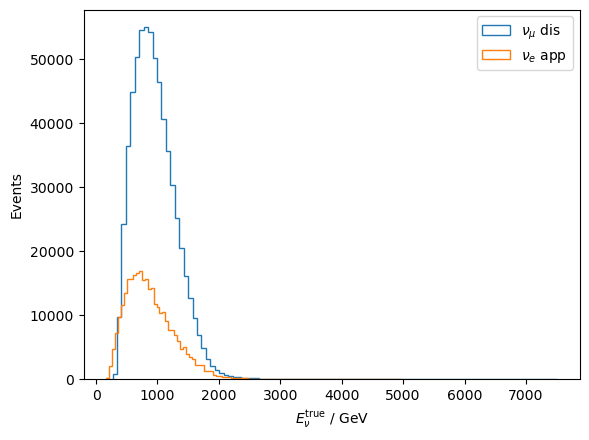

In [ ]:
_=plt.hist(Etrue, bins=100, weights=Weight, fc='orange', histtype='step', density=False, label=r'$\nu_\mu$ dis')
_=plt.hist(Etrue_app, bins=100, weights=Weight_app, fc='dodgerblue', histtype='step', density=False, label=r'$\nu_e$ app')
plt.xlabel(r'$E_\nu^{\rm true}$ / GeV')
plt.ylabel('Events')
plt.legend()
# plt.yscale('log')

## Testing the parameter scan functions

In [61]:
df

,ntuple_iflux,ntuple_ibkgd,ntuple_nuchan,ntuple_inno,ntuple_enugen,ntuple_energy,ntuple_nuleng,ntuple_parid,ntuple_wgt,ntuple_ispi0,ntuple_isdirt,cv_weight,sample_id
0,16,1,1,1,0.748539,0.586441,0.540010,8,1.280000,False,False,0.584226,2
1,16,1,1,1,1.050601,1.176447,0.505790,8,1.280000,False,False,0.584226,2
2,16,1,1,1,0.639477,0.639715,0.500775,8,1.280000,False,False,0.584226,2
3,16,1,1,1,0.781733,0.687917,0.518337,8,1.280000,False,False,0.584226,2
4,16,1,1,1,1.278093,1.281373,0.505317,8,1.280000,False,False,0.584226,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
598837,16,1,1,1,1.088145,1.083380,0.538890,8,1.280000,False,False,0.584226,2
598838,16,1,1,1,0.780421,0.826547,0.525561,8,1.280000,False,False,0.584226,2
598839,16,3,3,1,1.310826,0.686229,0.536201,8,0.640044,False,False,0.292133,2
598840,16,1,1,1,0.743811,0.811701,0.494850,8,1.280000,False,False,0.584226,2


In [ ]:
MC_numus_from_nue_events = np.dot(
            np.histogram(
                Etrue_app*1e-3, bins=param_scan.e_prod_e_int_bins, weights=Weight_app
            )[0],
            mini.apps.migration_matrix_official_bins_numu,
            )

MC_numus_from_numu_events = np.dot(
            np.histogram(
                Etrue*1e-3, bins=param_scan.e_prod_e_int_bins, weights=Weight
            )[0],
            mini.apps.migration_matrix_official_bins_numu,
            )

normalization = np.diff(bin_edges_numu_app)
plt.step(bin_edges_numu_app[:-1], numu_MC_app/normalization, where='post', color='black', label=r'2020 prediction', ls=(1,(5,1)))
# plt.step(bin_edges_numu_app[:-1], MC_numus_from_nue_events/normalization, where='post', color='orange', label='2020 MC')
# plt.step(bin_edges_numu_app[:-1], MC_numus_from_numu_events/normalization/1.85, where='post', color='red', label='2020 MC')

MC_numu, _ = np.histogram(Ereco, weights=Weight, bins=bin_edges_numu_app, density=False)
bin_c = (bin_edges_numu_app[:-1] + bin_edges_numu_app[1:])/2
plt.step(bin_edges_numu_app[:-1], (MC_numu)/normalization/1.85, where='post', color='blue', label=r'2009 $\nu_\mu$ dis analysis (MC)')

counts = np.histogram(df['ntuple_energy']*1e3, bins=micro.bin_edges_numu, weights=df['cv_weight'])[0]
plt.step(micro.bin_edges_numu[:-1], counts/np.diff(micro.bin_edges_numu), where='post', color='red', ls=(1,(5,2)))

plt.xlim(200,1500)
plt.ylabel('Events/MeV')
plt.xlabel('Energy (MeV)')
plt.legend()


NameError: name 'Etrue_app' is not defined